In [1]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl
import matplotlib.pyplot as plt
import cupy as cp
import os

from zte_recon.data_zte import Data_Arc_ZTE, Data_CalcPhyllo_ZTE, Data_Product_ZTE, Data_EndpointsFile_ZTE 
from zte_recon.arc_zte_traj import read_params_from_kacq
from zte_recon.util.sens import est_maps_3d
from zte_recon.bart_dims import ksp_to_bart, coord_to_bart
from zte_recon.psf import calc_psf_coords, sidelobe_to_peak_ratio

/home/shreya/cont-slew-zte/venv/lib/python3.10/site-packages/sigpy/config.py:27: UserWarning: Importing cupy.cuda.cudnn failed. For more details, see the error stack below:
libcudnn.so.8: cannot open shared object file: No such file or directory
  warnings.warn(


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

os.environ["OMP_NUM_THREADS"] = "36"

# Load acquired data

In [3]:
seg_rot_file = '/home/shreya/cont-slew-zte/rot_txt_files/seg_golden3d_rotMats_large.txt'

# Shared acquisition parameters
dt_sampling = 8
grad_dt_sampling = 4
nPtsPerSpoke = None
rBW=31.25e3

# Reconstruction parameters
FOV_scale = 1
FOV_scale_dir = [1,1,1]
ndrop_ROpts = 1
img_shape = [256,256,256]

In [4]:
print('Loading data')

##############

### ArcZTE
spoke_rot_file = None
grad_segment_file = '/mikLKS/shreya/cont_slew_zte_data/20250515/Series11/kacq_arc_zte.25974'
matlab_save_dir = '/mikLKS/shreya/cont_slew_zte_eval/20250515/Series11/'

params = read_params_from_kacq(grad_segment_file)
arc_angle = params['arc_angle']
a_grad = params['a_grad']
points_per_spoke = params['points_per_spoke']
points_before_curve = params['points_before_curve']

Data_arczte1 = Data_Arc_ZTE(spoke_rot_file, seg_rot_file, arc_angle, points_per_spoke, 
                 points_before_curve, dt_sampling, grad_dt_sampling, a_grad, grad_segment_file,
                 matlab_save_dir, FOV_scale=FOV_scale, FOV_scale_dir=FOV_scale_dir, ndrop_ROpts=ndrop_ROpts)
Data_arczte1.gradient_corr(-0.5)

##############

### ArcZTE
spoke_rot_file = None
grad_segment_file = '/mikLKS/shreya/cont_slew_zte_data/20250515/Series12/kacq_arc_zte.51323'
matlab_save_dir = '/mikLKS/shreya/cont_slew_zte_eval/20250515/Series12/'

params = read_params_from_kacq(grad_segment_file)
arc_angle = params['arc_angle']
a_grad = params['a_grad']
points_per_spoke = params['points_per_spoke']
points_before_curve = params['points_before_curve']

Data_arczte2 = Data_Arc_ZTE(spoke_rot_file, seg_rot_file, arc_angle, points_per_spoke, 
                 points_before_curve, dt_sampling, grad_dt_sampling, a_grad, grad_segment_file,
                 matlab_save_dir, FOV_scale=FOV_scale, FOV_scale_dir=FOV_scale_dir, ndrop_ROpts=ndrop_ROpts)
Data_arczte2.gradient_corr(-0.5)


##############

### ArcZTE
spoke_rot_file = None
grad_segment_file = '/mikLKS/shreya/cont_slew_zte_data/20250515/Series13/kacq_arc_zte.34665'
matlab_save_dir = '/mikLKS/shreya/cont_slew_zte_eval/20250515/Series13/'

params = read_params_from_kacq(grad_segment_file)
arc_angle = params['arc_angle']
a_grad = params['a_grad']
points_per_spoke = params['points_per_spoke']
points_before_curve = params['points_before_curve']

Data_arczte3 = Data_Arc_ZTE(spoke_rot_file, seg_rot_file, arc_angle, points_per_spoke, 
                 points_before_curve, dt_sampling, grad_dt_sampling, a_grad, grad_segment_file,
                 matlab_save_dir, FOV_scale=FOV_scale, FOV_scale_dir=FOV_scale_dir, ndrop_ROpts=ndrop_ROpts)
Data_arczte3.gradient_corr(-0.5)


###############

### Phyllotaxis
matlab_save_dir = '/mikLKS/shreya/cont_slew_zte_eval/20250515/Series7/'
smoothness = 10
gm_flag = False
segsPerInterleaf = 1

Data_phyllozte = Data_CalcPhyllo_ZTE(smoothness, gm_flag, segsPerInterleaf, 
                 matlab_save_dir, nPtsPerSpoke, rBW, FOV_scale, FOV_scale_dir, ndrop_ROpts)
Data_phyllozte.gradient_corr(-0.5)

###############

### AZTEK
matlab_save_dir = '/mikLKS/shreya/cont_slew_zte_eval/20250515/Series9/'
endpoints_txt_path = '/mikLKS/shreya/cont_slew_zte_data/20250515/Series9/kacq_aztek.122313985'

Data_aztek = Data_EndpointsFile_ZTE(endpoints_txt_path, 
                 matlab_save_dir, nPtsPerSpoke, rBW,
                 FOV_scale, FOV_scale_dir, ndrop_ROpts)
Data_aztek.gradient_corr(-0.5)

#############

# Standard
matlab_save_dir = '/mikLKS/shreya/cont_slew_zte_eval/20250515/Series4/'
endpoints_txt_path = '/mikLKS/shreya/cont_slew_zte_data/20250515/Series4/kacq_stdzte.115626065'

Data_standard2 = Data_EndpointsFile_ZTE(endpoints_txt_path, 
                 matlab_save_dir, nPtsPerSpoke, rBW,
                 FOV_scale, FOV_scale_dir, ndrop_ROpts)
Data_standard2.gradient_corr(-0.5)

Loading data
Loading ksp from h5 dir: /mikLKS/shreya/cont_slew_zte_eval/20250515/Series11/
Setting nPtsPerSpoke to opxres 256
Applied gradient delay correction of -0.5
Loading ksp from h5 dir: /mikLKS/shreya/cont_slew_zte_eval/20250515/Series12/
Setting nPtsPerSpoke to opxres 256
Applied gradient delay correction of -0.5
Loading ksp from h5 dir: /mikLKS/shreya/cont_slew_zte_eval/20250515/Series13/
Setting nPtsPerSpoke to opxres 256
Applied gradient delay correction of -0.5
Loading ksp from h5 dir: /mikLKS/shreya/cont_slew_zte_eval/20250515/Series7/
Setting nPtsPerSpoke to opxres 256
Applying gradient delay correction of -0.5
Loading ksp from h5 dir: /mikLKS/shreya/cont_slew_zte_eval/20250515/Series9/
Setting nPtsPerSpoke to opxres 256
Applying gradient delay correction of -0.5
Loading ksp from h5 dir: /mikLKS/shreya/cont_slew_zte_eval/20250515/Series4/
Setting nPtsPerSpoke to opxres 256
Applying gradient delay correction of -0.5


# PSFs over temporal bins

In [22]:
def calc_psfs_temp_durations(DataObj, img_shape, nSpokes_list=[260, 440, 880, 2200]):
        
    psfs_all = np.zeros((len(nSpokes_list), *img_shape), dtype=np.complex128) 
    sprs_all = []
    
    for i, nSpokes in enumerate(nSpokes_list):
        
        spokes_recon = np.arange(0, nSpokes, 1)
        ksp_full, coord_full = DataObj.combine_waspiHires_flat(spokes_subset=spokes_recon)
        
        psf_single = calc_psf_coords(coord_full, img_shape)
        psfs_all[i] = psf_single
        sprs_all.append(sidelobe_to_peak_ratio(psf_single))
    
    return psfs_all, sprs_all

In [23]:
def sidelobe_to_peak_ratio(psf_im):

    psr = np.max(abs(psf_im))/np.partition(abs(psf_im).flatten(), -2)[-2]
    
    return 1/psr

In [24]:
nSpokes_test2 = np.arange(550, 9000, 550)
nSpokes_test2 = np.concatenate((np.array([220]), nSpokes_test2))

psfs_arc13, sprs_arc13 = calc_psfs_temp_durations(Data_arczte13, img_shape, nSpokes_list=nSpokes_test2)
psfs_arc53, sprs_arc53 = calc_psfs_temp_durations(Data_arczte53, img_shape, nSpokes_list=nSpokes_test2)
psfs_arc83, sprs_arc83 = calc_psfs_temp_durations(Data_arczte83, img_shape, nSpokes_list=nSpokes_test2)

psfs_phyllo, sprs_phyllo = calc_psfs_temp_durations(Data_phyllozte, img_shape, nSpokes_list=nSpokes_test2)
psfs_aztek, sprs_aztek = calc_psfs_temp_durations(Data_aztek, img_shape, nSpokes_list=nSpokes_test2)
psfs_standard, sprs_standard = calc_psfs_temp_durations(Data_standard, img_shape, nSpokes_list=nSpokes_test2)

NameError: name 'Data_arczte13' is not defined

# Plot sidelobe-to-peak ratio over temporal resolutions

<IPython.core.display.Javascript object>


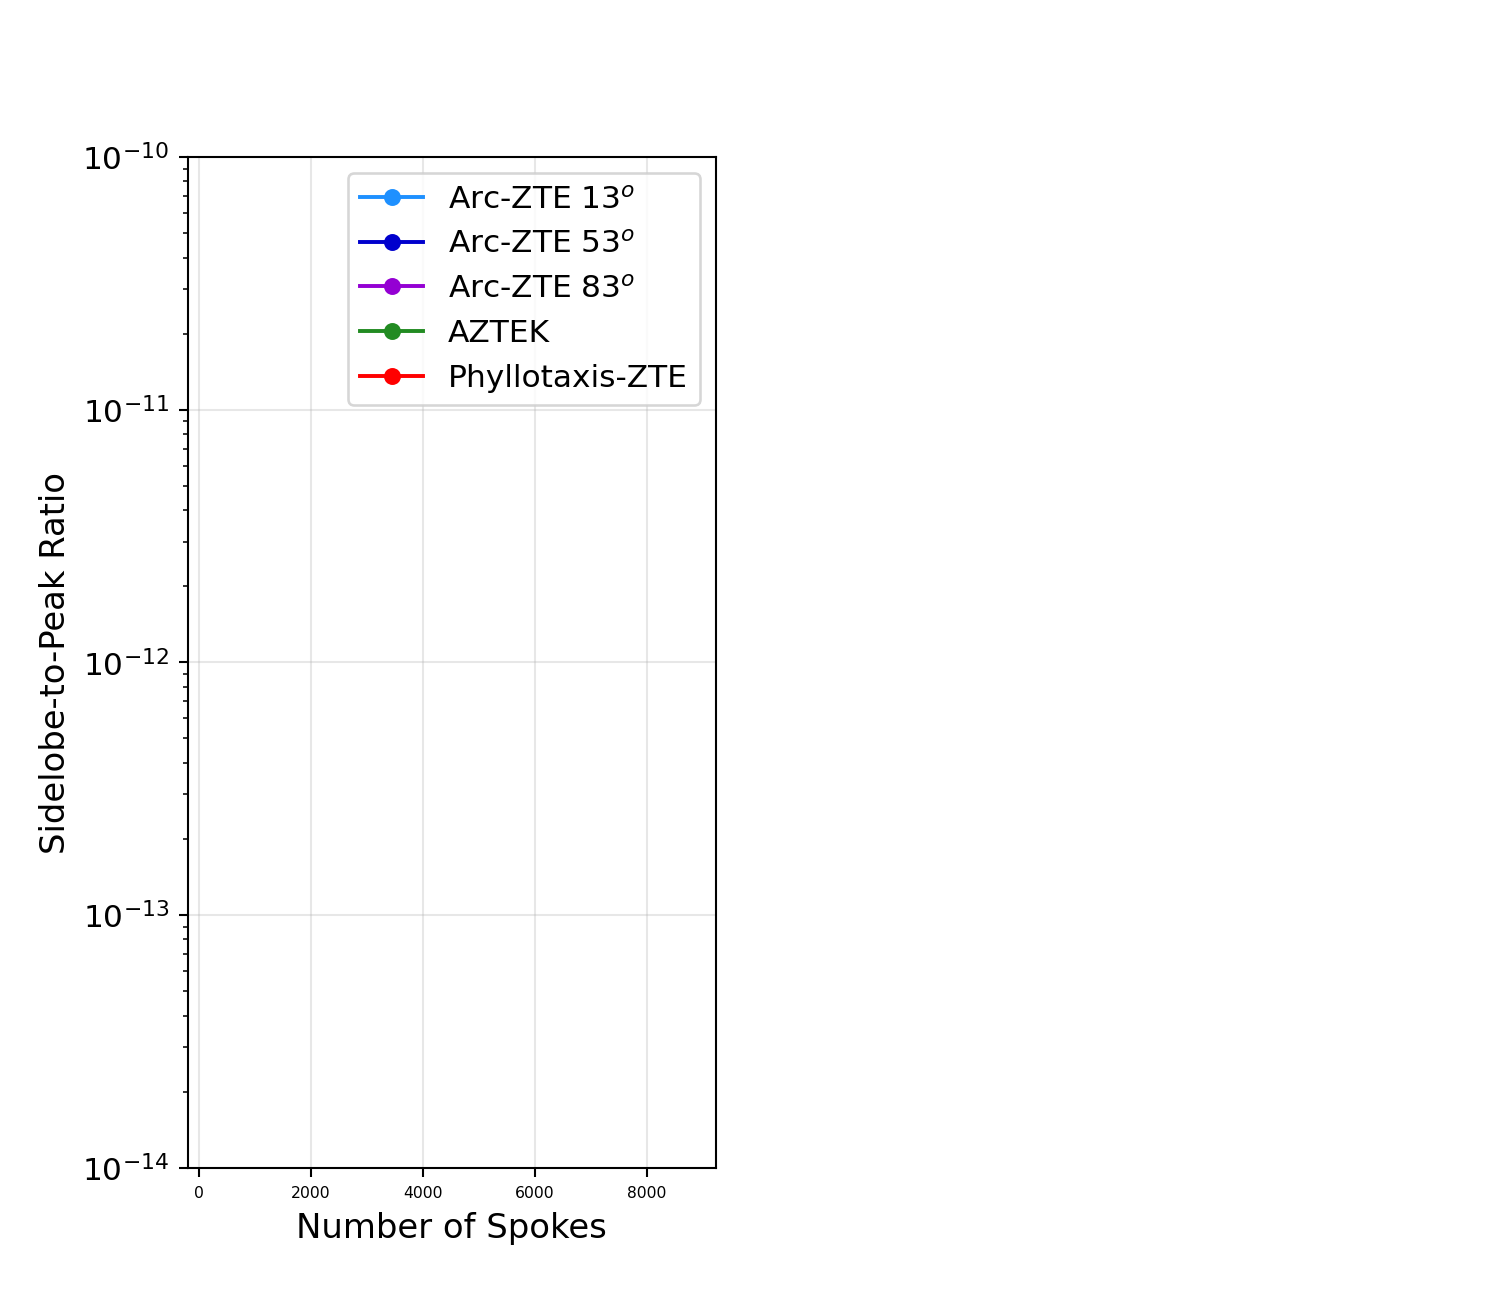

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

In [43]:
plt.figure(figsize=(8,7))
ax1 = plt.subplot(121)
colors = ['dodgerblue', 'mediumblue',  'darkviolet', 'forestgreen', 'red', 'darkorange']
plt.plot(nSpokes_list, sprs_arc13, '.-', markersize=11,label='Arc-ZTE 13$^o$', color='dodgerblue')
plt.plot(nSpokes_list, sprs_arc53, '.-', markersize=11,label='Arc-ZTE 53$^o$', color='mediumblue')
plt.plot(nSpokes_list, sprs_arc83, '.-', markersize=11,label='Arc-ZTE 83$^o$', color='darkviolet')
plt.plot(nSpokes_list, sprs_aztek, '.-', markersize=11,label='AZTEK', color='forestgreen')
plt.plot(nSpokes_list, sprs_phyllo, '.-', markersize=11,label='Phyllotaxis-ZTE', color='red')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.ylabel('Sidelobe-to-Peak Ratio', fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('Number of Spokes', fontsize=13)
plt.xticks(fontsize=12)

In [44]:
plt.savefig('saved_figures/sidelobe_to_peak_ratios.png', dpi=800)

# Visualize point spread functions

In [45]:
def calculate_psf_from_data(DataObj, nSpokes):
    
    spokes_recon = np.arange(0, nSpokes, 1)
    ksp_full, coord_full = DataObj.combine_waspiHires_flat(spokes_subset=spokes_recon)
    psf_single = calc_psf_coords(coord_full, img_shape)
    return psf_single

In [71]:
idx = [0, 4, 8]

<IPython.core.display.Javascript object>


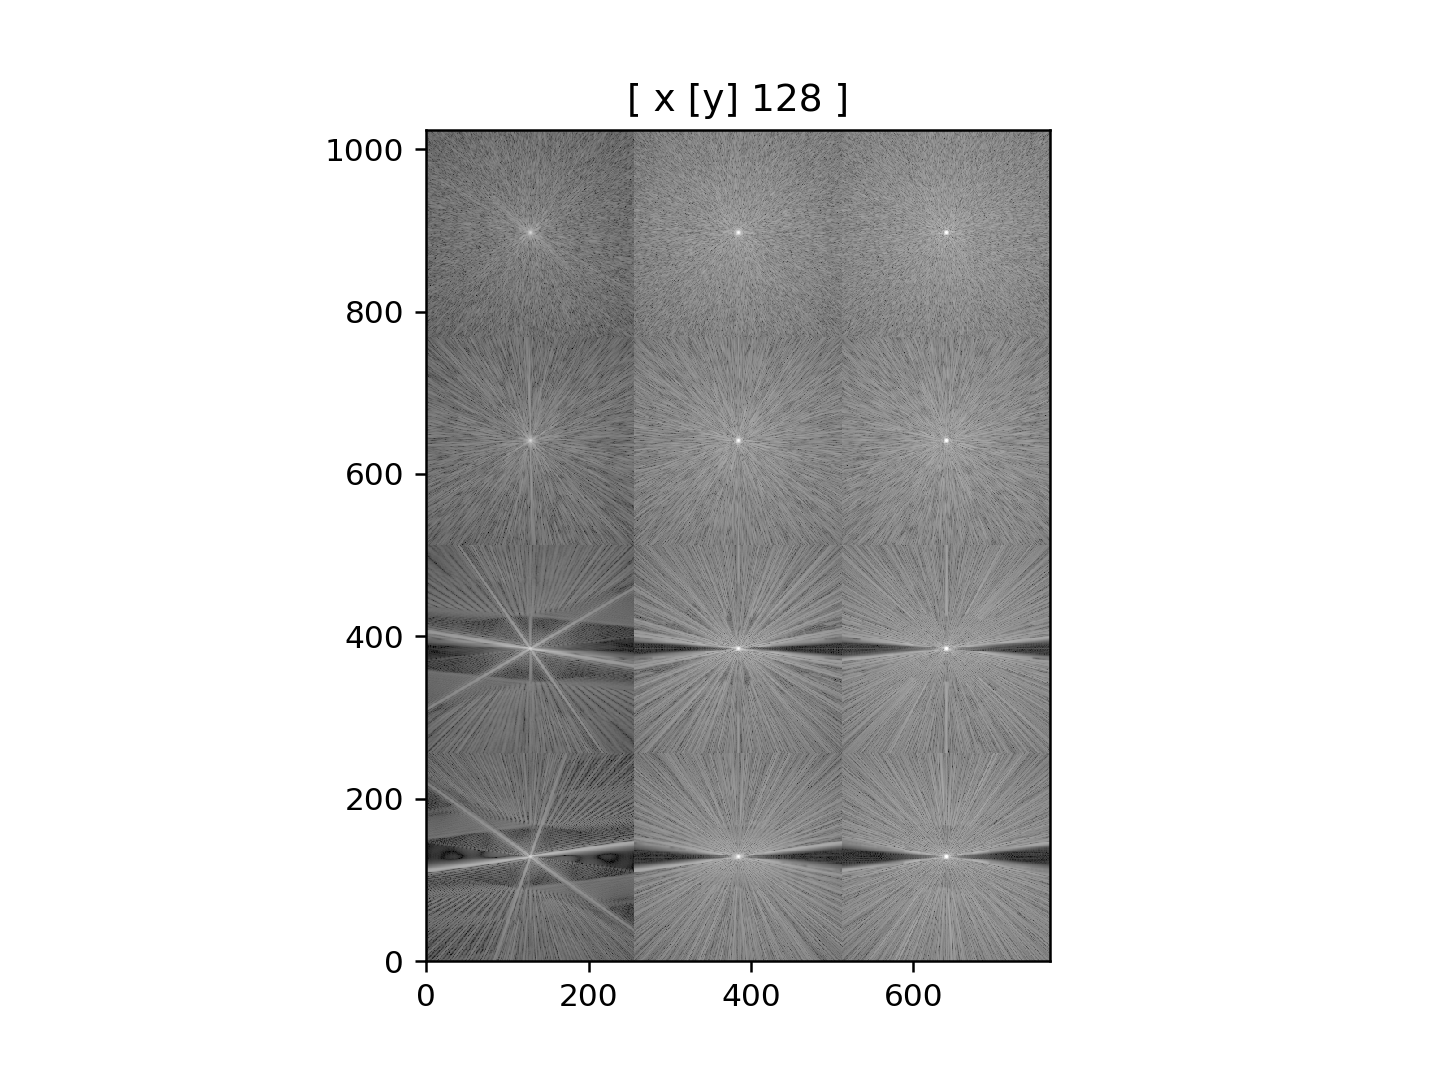

In [138]:
pl.ImagePlot(np.concatenate((abs(psfs_aztek[idx].transpose(0,3,2,1).reshape(-1, 256, 256)), 
                             abs(psfs_phyllo[idx].transpose(0,3,2,1).reshape(-1, 256, 256)), 
                             abs(psfs_arc13[idx].transpose(0,3,2,1).reshape(-1, 256, 256)), 
                             abs(psfs_arc53[idx].transpose(0,3,2,1).reshape(-1, 256, 256))), axis=1))

In [100]:
plt.savefig('saved_figures/fig7_psfs_temporal.png', dpi=900)

<IPython.core.display.Javascript object>


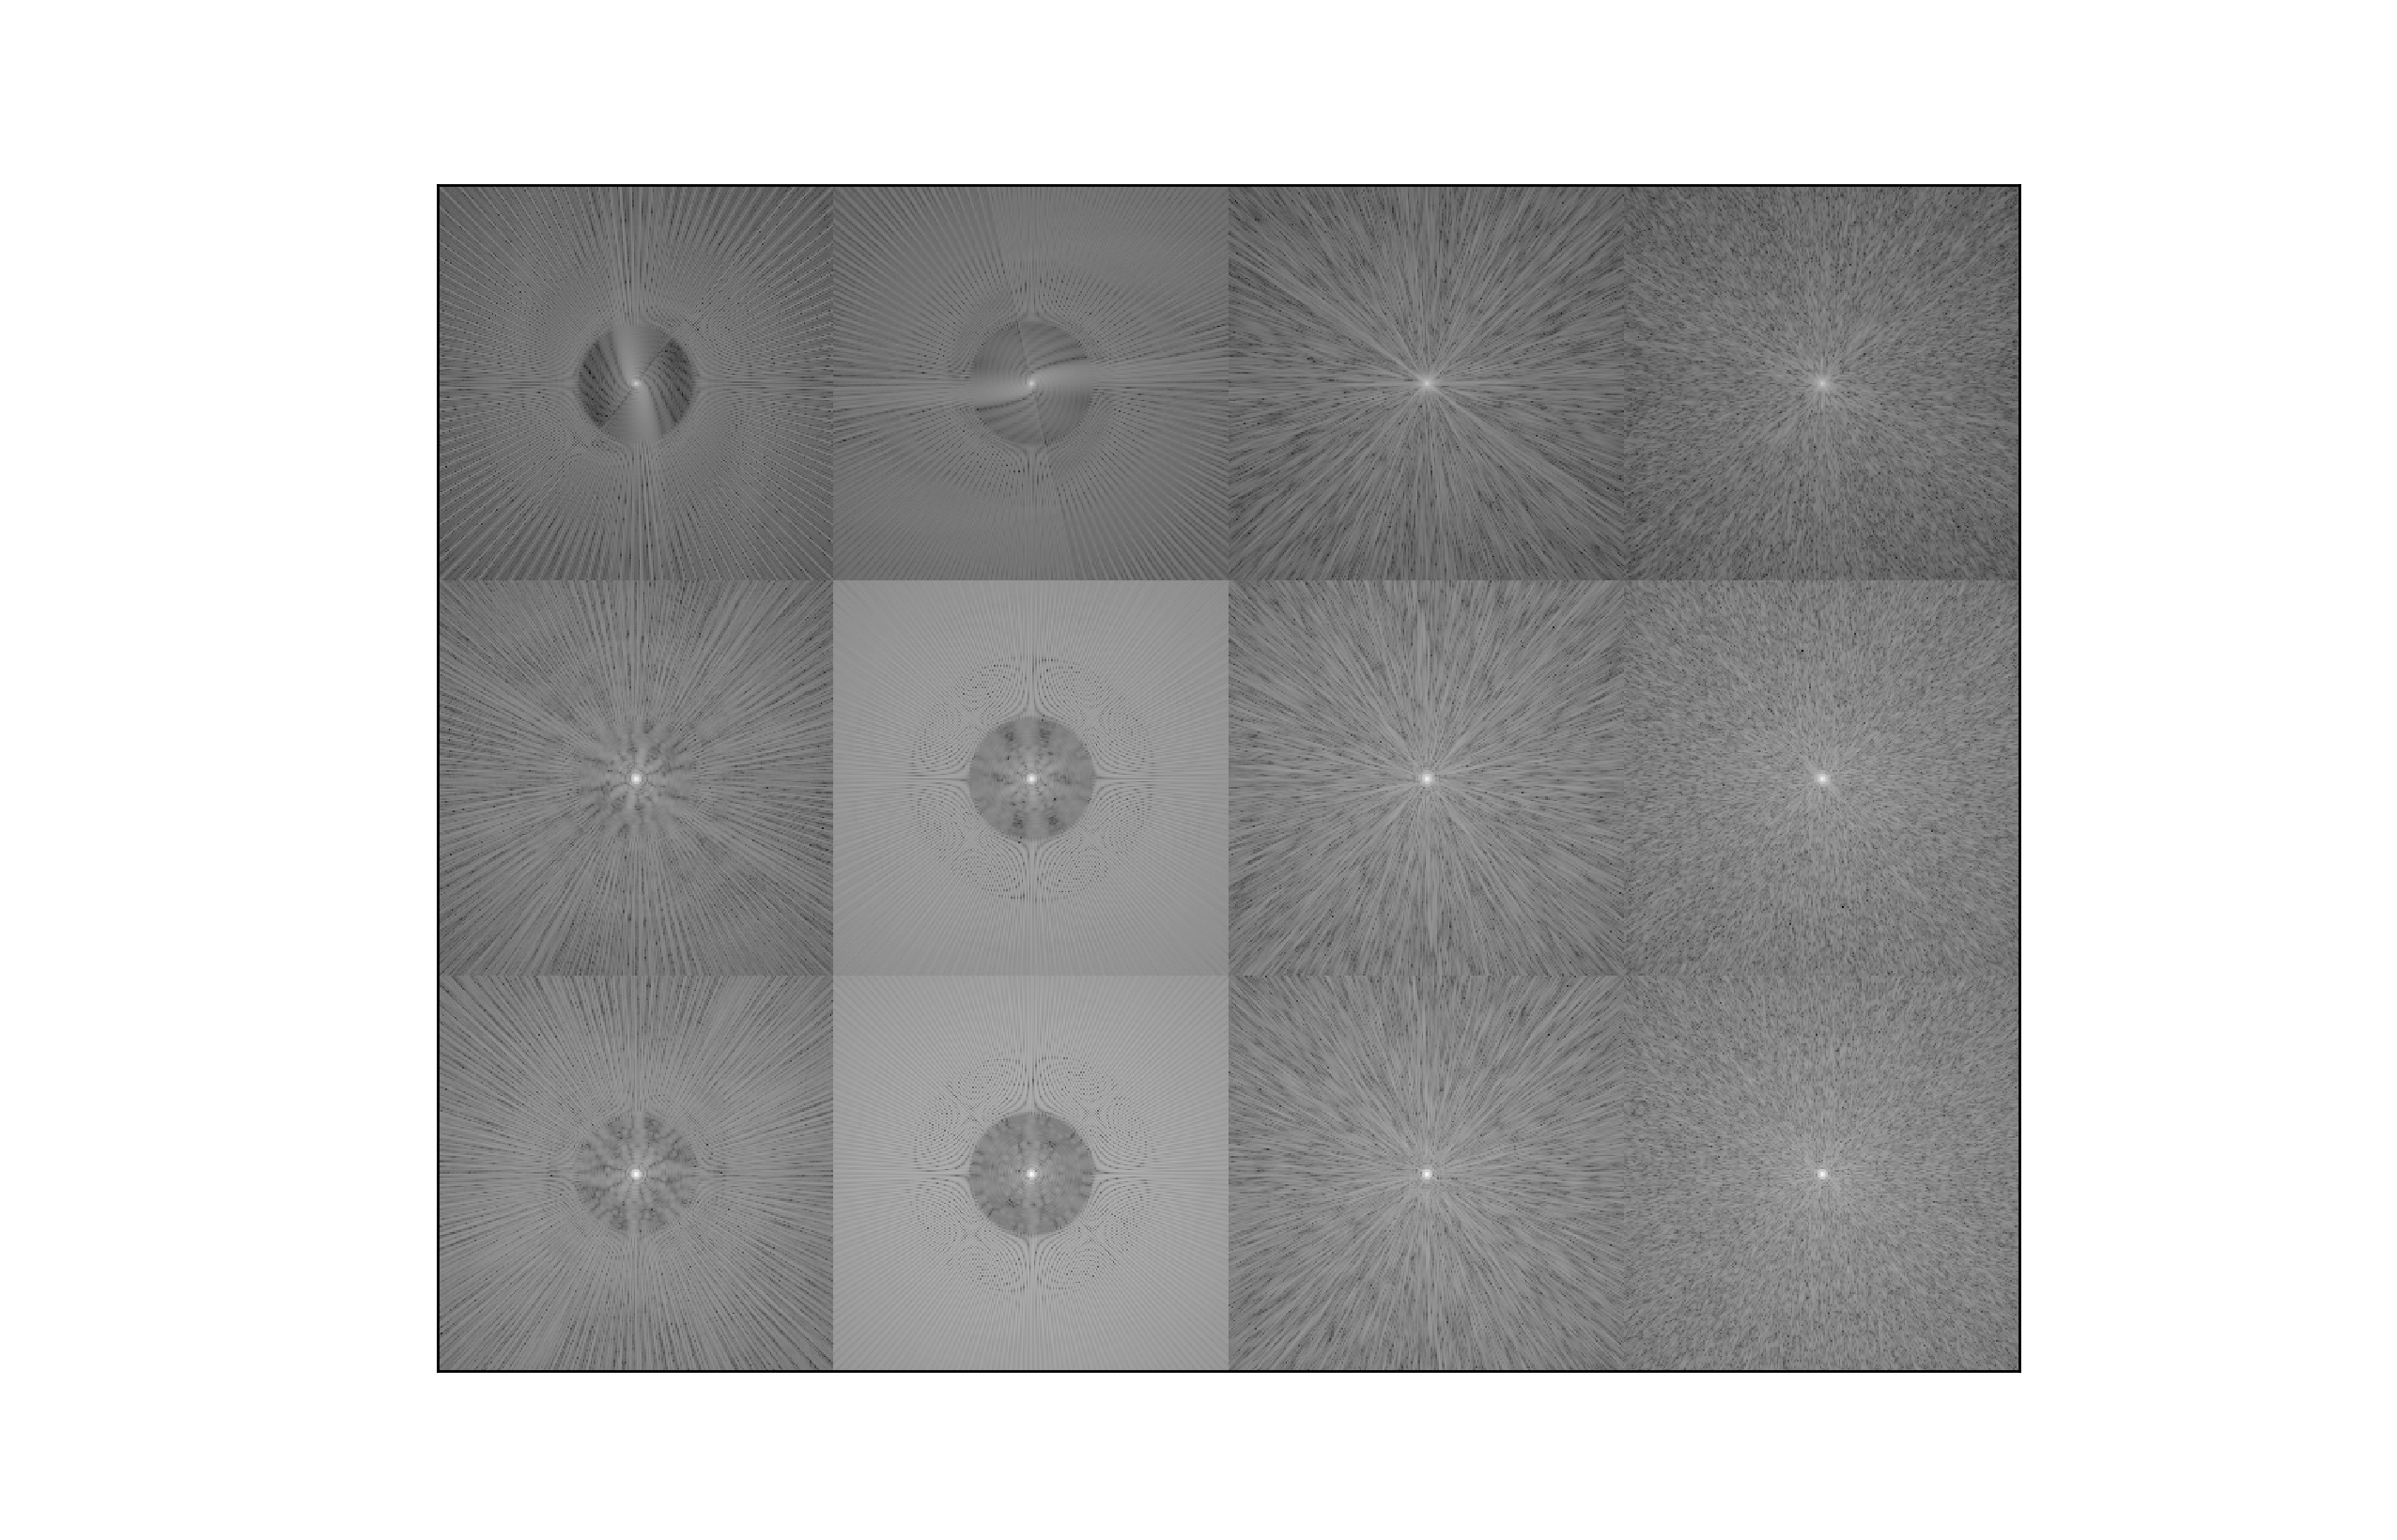

In [96]:
pl.ImagePlot(np.concatenate((abs(psfs_aztek[idx].reshape(-1, 256, 256)), 
                             abs(psfs_phyllo[idx].reshape(-1, 256, 256)), 
                             abs(psfs_arc13[idx].reshape(-1, 256, 256)), 
                             abs(psfs_arc53[idx].reshape(-1, 256, 256))), axis=1))

In [98]:
plt.savefig('saved_figures/fig7_psfs_temporal2.png', dpi=900)

<IPython.core.display.Javascript object>


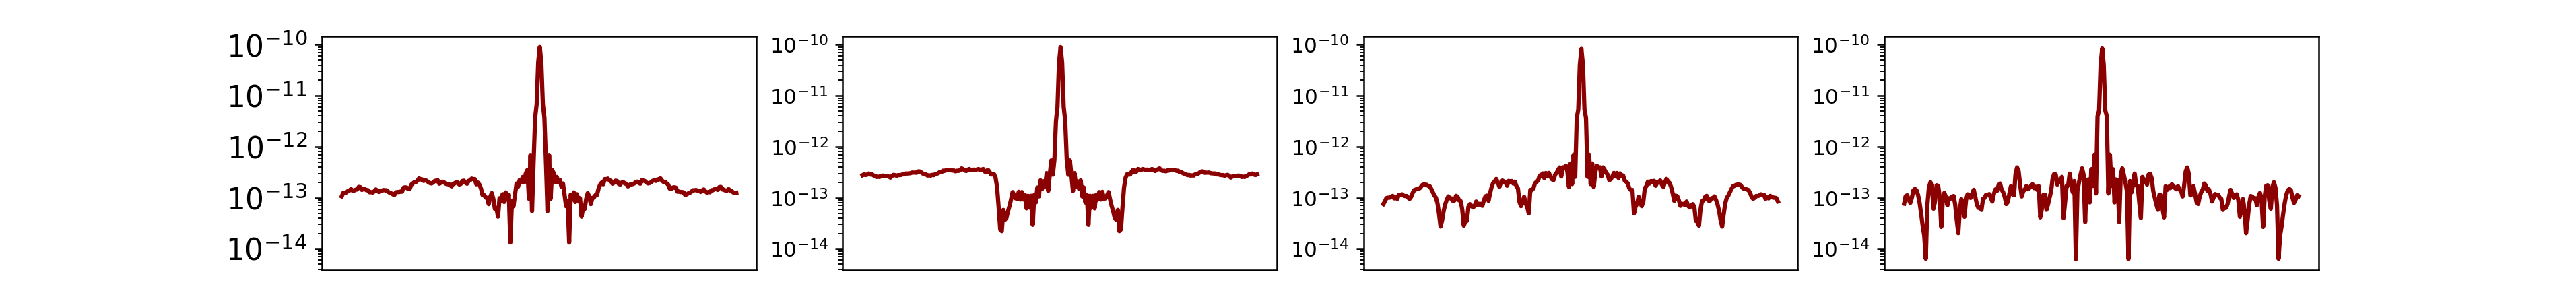

([], [])

In [160]:
plt.figure(figsize=(17,2))
ax1 = plt.subplot(141)
plt.plot(abs(psfs_aztek[8, 128, :, 128]), linewidth=2, color='darkred')
plt.xticks([])
plt.yticks(fontsize=14)

ax2 = plt.subplot(142, sharey=ax1)
plt.plot(abs(psfs_phyllo[8, 128, :, 128]), linewidth=2, color='darkred')
plt.xticks([])
plt.yticks(fontsize=14)

plt.subplot(143, sharey=ax1)
plt.plot(abs(psfs_arc13[8, 128, :, 128]), linewidth=2, color='darkred')
plt.xticks([])
plt.yticks(fontsize=14)

plt.subplot(144, sharey=ax1)
plt.plot(abs(psfs_arc53[8, 128, :, 128]), linewidth=2, color='darkred')
plt.xticks([])
plt.yticks(fontsize=14)


In [161]:
plt.savefig('saved_figures/fig7_line_psfs_ylabel.png', dpi=800)